In [11]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

# Set random seed so output is all same
np.random.seed(1)

class KMeans(object):

    def __init__(self):  # No need to implement
        pass

    def pairwise_dist(self, x, y):  # [5 pts]
        """
        Args:
            x: N x D numpy array
            y: M x D numpy array
        Return:
                dist: N x M array, where dist2[i, j] is the euclidean distance between 
                x[i, :] and y[j, :]
                """
        #menghitung jarak absolut euclidean distance
        xSumSquare = np.sum(np.square(x),axis=1);
        ySumSquare = np.sum(np.square(y),axis=1);
        mul = np.dot(x, y.T);
        dists = np.sqrt(abs(xSumSquare[:, np.newaxis] + ySumSquare-2*mul))
        return dists

    # menentukan pusat cluster 
    # default random
    def _init_centers(self, points, K, **kwargs):  # [5 pts]
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            kwargs: any additional arguments you want
        Return:
            centers: K x D numpy array, the centers. 
        """
        row, col = points.shape
        retArr = np.empty([K, col])
        for number in range(K):
            randIndex = np.random.randint(row)
            retArr[number] = points[randIndex]
        
        return retArr

    def _update_assignment(self, centers, points):  # [10 pts]
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            points: NxD numpy array, the observations
        Return:
            cluster_idx: numpy array of length N, the cluster assignment for each point

        Hint: You could call pairwise_dist() function.
        """
        # menentukan indeks klaster
        row, col = points.shape
        cluster_idx = np.empty([row])
        distances = self.pairwise_dist(points, centers)
        cluster_idx = np.argmin(distances, axis=1)
        
        #bentuknya list/array
        return cluster_idx

    def _update_centers(self, old_centers, cluster_idx, points):  # [10 pts]
        """
        Args:
            old_centers: old centers KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            centers: new centers, K x D numpy array, where K is the number of clusters, and D is the dimension.
        """
        
        #menentukan titik tengah paling optimal
        K, D = old_centers.shape
        new_centers = np.empty(old_centers.shape)
        for i in range(K):
            new_centers[i] = np.mean(points[cluster_idx == i], axis = 0)
        return new_centers

    def _get_loss(self, centers, cluster_idx, points):  # [5 pts]
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            loss: a single float number, which is the objective function of KMeans. 
        """
        dists = self.pairwise_dist(points, centers)
        loss = 0.0
        N, D = points.shape
        for i in range(N):
            loss = loss + np.square(dists[i][cluster_idx[i]])
        
        return loss

    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):
        """
        Return:
            cluster assignments: Nx1 int numpy array
            cluster centers: K x D numpy array, the centers
            loss: final loss value of the objective function of KMeans
        """
        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            cluster_idx = self._update_assignment(centers, points)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            if verbose:
                print('iter %d, loss: %.4f' % (it, loss))
        return cluster_idx, centers, loss

(20640, 2)
[[  37.88 -122.23]
 [  37.86 -122.22]
 [  37.85 -122.24]
 [  37.85 -122.25]
 [  37.85 -122.25]]


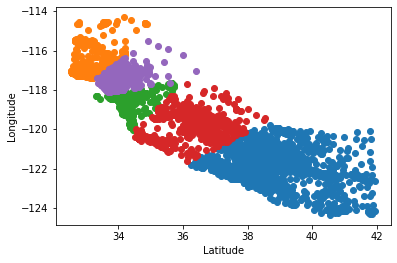

In [12]:
import csv

dataset = csv.reader(open("housing-contoh.csv", "r"))
dataset = np.array(list(dataset))
# Ambil kolom latitude dan longitude
dataset = dataset[1:, 6:8]
# Ubah tipe data jdi float
dataset = dataset.astype('float64')
print(dataset.shape)
print(dataset[:5])

k = 5 # feel free to change this value
cluster_idx, centers, loss = KMeans()(dataset, k)

# Pisahkan data sesuai cluster
data_cluster = []
for i in range(k):
    data_idx = []
    j = 0
    while j < len(cluster_idx):
        if cluster_idx[j] == i:
            data_idx.append(dataset[j])
        j += 1

    data_arr = np.array(data_idx)
    data_cluster.append(data_arr)

# Tampilkan dalam Scatter plot
for data_c in data_cluster:
    plt.scatter(data_c[:, 0], data_c[:, 1])

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
